# **Задание:**

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6.Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4..

Датасет: [wine](https://www.kaggle.com/brynja/wineuci/downloads/wineuci.zip/1)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve,confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

import warnings
from google.colab import files
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [9]:
# Считывание данных
data = pd.read_csv('Wine.csv', sep=";")
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# Типы данных
data.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [11]:
# Проверка на пустые значения
for col in data.columns:
    print('{} - {}'.format(col, data[data[col].isnull()].shape[0]))

Class - 0
Alcohol - 0
Malic acid - 0
Ash - 0
Alcalinity of ash - 0
Magnesium - 0
Total phenols - 0
Flavanoids - 0
Nonflavanoid phenols - 0
Proanthocyanins - 0
Color intensity - 0
Hue - 0
OD280/OD315 of diluted wines - 0
Proline - 0


In [12]:
# Размерность данных
data.shape

(178, 14)

In [13]:
CLASS = 'Class'
RANDOM_STATE = 17
TEST_SIZE = 0.3

X = data.drop(CLASS, axis=1).values
Y = data[CLASS].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y)
print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (124, 13)
X_test: (54, 13)


### **Обучение**

Случайный лес

In [14]:
# n_estimators = 10 (default)
rfc = RandomForestClassifier().fit(X_train, Y_train)
predicted_rfc = rfc.predict(X_test)

accuracy_score(Y_test, predicted_rfc)

0.9814814814814815

AdaBoost

In [15]:
abc = AdaBoostClassifier().fit(X_train, Y_train)
predicted_abc = abc.predict(X_test)

accuracy_score(Y_test, predicted_abc)

0.8333333333333334

### **Подбор гиперпараметров**

Случайный лес

In [16]:
rfc_n_range = np.array(range(5,100,5))
rfc_tuned_parameters = [{'n_estimators': rfc_n_range}]
rfc_tuned_parameters

warnings.filterwarnings('ignore')
gs_rfc = GridSearchCV(RandomForestClassifier(), rfc_tuned_parameters, cv=5, scoring='accuracy')
gs_rfc.fit(X_train, Y_train)

gs_rfc.best_params_

{'n_estimators': 75}

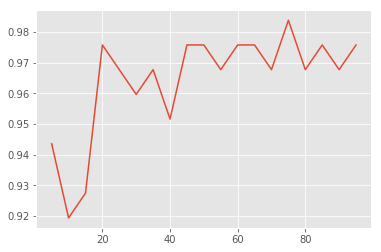

In [17]:
plt.plot(rfc_n_range, gs_rfc.cv_results_['mean_test_score'])

AdaBoost

In [18]:
abc_n_range = np.array(range(5,100,5))
abc_tuned_parameters = [{'n_estimators': abc_n_range}]
abc_tuned_parameters

gs_abc = GridSearchCV(AdaBoostClassifier(), abc_tuned_parameters, cv=5, scoring='accuracy')
gs_abc.fit(X_train, Y_train)

gs_abc.best_params_

{'n_estimators': 10}

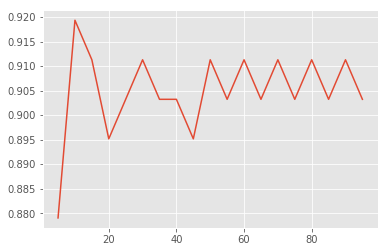

In [19]:
plt.plot(abc_n_range, gs_abc.cv_results_['mean_test_score'])

### **Сравнение моделей после подбора гиперпараметров**

Случайный лес

In [20]:
rfc_optimized = RandomForestClassifier(n_estimators=gs_rfc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_rfc_opt = rfc_optimized.predict(X_test)

accuracy_score(Y_test, predicted_rfc_opt)

1.0

AdaBoost

In [21]:
abc_optimized = RandomForestClassifier(n_estimators=gs_abc.best_params_['n_estimators']).fit(X_train, Y_train)
predicted_abc_opt = abc_optimized.predict(X_test)

accuracy_score(Y_test, predicted_abc_opt)

0.9444444444444444